In [1]:
from environment import Environment
from agent import Agent
from main import GCFModel
import measurement
import numpy as np

\\csce.datastore.ed.ac.uk\csce\eng\users\s2013568\Win7\Desktop\DEM\DEM_test-1\Ageng_based_simulation\Force_based_model\main.py:99: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b,angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]
\\csce.datastore.ed.ac.uk\csce\eng\users\s2013568\Win7\Desktop\DEM\DEM_test-1\Ageng_based_simulation\Force_based_model\main.py:129: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  new_agent_circles = [patches.Ellipse(agent.position, 2*agent.a, 2*agent.b, angle=misc.calculate_angle(agent.velocity), color='b', fill=False, edgecolor='b') for agent in self.agents]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


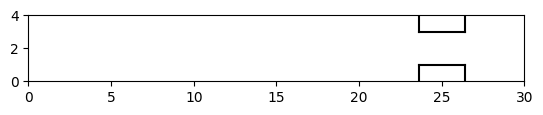

In [2]:
# Function to calculate flow rate
def calculate_flow_rate(step_of_passing):
    return (60 - 1) / step_of_passing

# Define range for bottleneck_height    
bottleneck_heights = [2.0]

# Initialize lists to store results
flow_rates = []

# Run simulation for each bottleneck height
for bottleneck_height in bottleneck_heights:
    # Define environment
    env = Environment(width=30, height=4, bottleneck_width=2.8, bottleneck_height=bottleneck_height, location=(10, 0), periodic=False)
    
    # Initialize agents with 5 agents starting extremely close to each other
    agents = []
    num_agents = 2  # Set number of agents to 5

    # Define a starting position close to each other
    start_x = 5.0  # Arbitrary central starting point near the middle of the box
    start_y = 2.0
    agent_spacing = 1.0  # Very small spacing between agents

    # Place 5 agents close together
    # for i in range(num_agents):
    #     # Adjust x positions slightly for proximity
    #     x_pos = start_x + agent_spacing * i
    #     y_pos = start_y

        # agents.append(agent)
    agents = [Agent(position=[19, 0.5], velocity=[0.0, 0.0], a_min=0.18, b_min=0.2, tau=0.53, f=1.25, desired_walking_speed=1.34, test=False)
              
    ]
    # Initialize GCF model
    gcf_model = GCFModel(environment=env, agents=agents, time_constant=0.5, eta=0.2)
    
    # Optionally, animate the system
    gcf_model.animate(steps=1000, dt=0.01, interval=50000, output_filename="crowd_simulation_close_agents.gif", show_forces=True)
    
    # Run the simulation
    #gcf_model.run_simulation(steps=10, dt=0.01, log_interval=10, verbose=False)

    # Calculate flow rate and record it
    # step_of_passing = gcf_model.recorded_step_of_passing[0]
    # flow_rate = calculate_flow_rate(step_of_passing)
    # flow_rates.append(flow_rate)


In [3]:
# Function to calculate flow rate
def calculate_flow_rate(step_of_passing):
    return (60 - 1) / step_of_passing

# Define range for bottleneck_height    
bottleneck_heights = np.arange(1.1, 2.6, 0.2)
# bottleneck_heights = [1.1]

# Initialize lists to store results
flow_rates = [0.009570154095701541, 0.014906518443658413, 0.024894514767932488]

# Run simulation for each bottleneck height
for bottleneck_height in bottleneck_heights:
    print(bottleneck_height)
    # Define environment
    env = Environment(width=30, height=4, bottleneck_width=2.8, bottleneck_height=bottleneck_height, location=(10, 0), periodic=False)
    
    # Initialize agents
    agents = []
    num_agents = 100  # Set the number of agents dynamically based on your needs

    # Define available space for agents
    start_x = 19.1  # Right boundary
    end_x = 0.5     # Left boundary
    start_y = 0.5   # Bottom boundary
    end_y = 3.5     # Top boundary
    available_width = start_x - end_x
    available_height = end_y - start_y
    available_area = available_width * available_height

    # Dynamically calculate the number of rows and columns
    aspect_ratio = available_width / available_height
    num_columns = int(np.sqrt(num_agents * aspect_ratio))  # Columns based on aspect ratio
    num_rows = int(num_agents / num_columns)

    # Calculate spacing dynamically based on available space and number of agents
    spacing_x = available_width / num_columns
    spacing_y = available_height / num_rows

    # Generate grid of agent positions
    x_positions = np.linspace(start_x, end_x, num_columns)
    y_positions = np.linspace(start_y, end_y, num_rows)

    # Place agents uniformly in both x and y directions
    for y in y_positions:
        for x in x_positions:
            if len(agents) >= num_agents:
                break
            agent = Agent(position=[x, y], velocity=[0.0, 0.0], a_min=0.18, b_min=0.1, tau=0.53, f=1.25, desired_walking_speed=1.34, test=False)
            agents.append(agent)
        if len(agents) >= num_agents:
            break
        
    gcf_model = GCFModel(environment=env, agents=agents, time_constant=0.5, eta=0.2)
    # gcf_model.animate(steps=400, dt=0.01, interval=1000000000, output_filename="test.gif", show_forces=True)
    gcf_model.run_simulation(steps=10000, dt=0.01, log_interval=100, verbose=True)

    
    # Calculate flow rate and record it
    if gcf_model.recorded_step_of_passing != []:
        step_of_passing = gcf_model.recorded_step_of_passing[0]
        flow_rate = calculate_flow_rate(step_of_passing)
        flow_rates.append(flow_rate)
    else:
        flow_rates.append(0)

Step 0:
  Agent 0: Position: [19.10025425  0.50008475], Velocity: [0.02542471 0.0084749 ], Force: [2.54247124 0.84749041]
 Test_agent: False, agent_testing: False, agent_tested: False
 passed 0
Step 100:
  Agent 0: Position: [20.0876209   0.77752682], Velocity: [1.78892584 0.46927665], Force: [0.99360079 0.10470868]
 Test_agent: False, agent_testing: False, agent_tested: False
 passed 0
Step 200:
  Agent 0: Position: [22.09169056  1.23351059], Velocity: [1.88002829 0.42410313], Force: [-3.47614786 -0.89817993]
 Test_agent: False, agent_testing: False, agent_tested: False
 passed 0
Step 300:
  Agent 0: Position: [23.07642533  1.56456194], Velocity: [0.54938637 0.13740787], Force: [-0.62968685 -0.4001512 ]
 Test_agent: False, agent_testing: False, agent_tested: False
 passed 0
Step 400:
  Agent 0: Position: [24.34234832  1.65594506], Velocity: [2.09115482 0.14313333], Force: [2.55157658 0.44943631]
 Test_agent: False, agent_testing: False, agent_tested: False
 passed 1
Step 500:
  Agent 

In [8]:
calculate_flow_rate(6165)

0.009570154095701541

In [4]:
flow_rates

[0.009570154095701541, 0.014906518443658413, 0.024894514767932488]